<a href="https://colab.research.google.com/github/NitinGK/Machine-Learning-with-Python/blob/master/GPU_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and verify PyTorch 1.0 and FastAI 1.0 installed on Colab. Make sure running with GPU.

In [0]:
#!pip install fastai==1.0.46 --force-reinstall
!pip install fastai -U

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.48)


In [0]:
#!pip list

In [0]:
import torch
import fastai

from fastai import *
from fastai.vision import *

print(torch.__version__)
print(fastai.__version__)

print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.0.1.post2
1.0.48
True
True


Alright. Now we have a fastai version that should work. Let's get the data and look at some dogs and cats.

In [0]:
path = untar_data(URLs.DOGS)
path

PosixPath('/root/.fastai/data/dogscats')

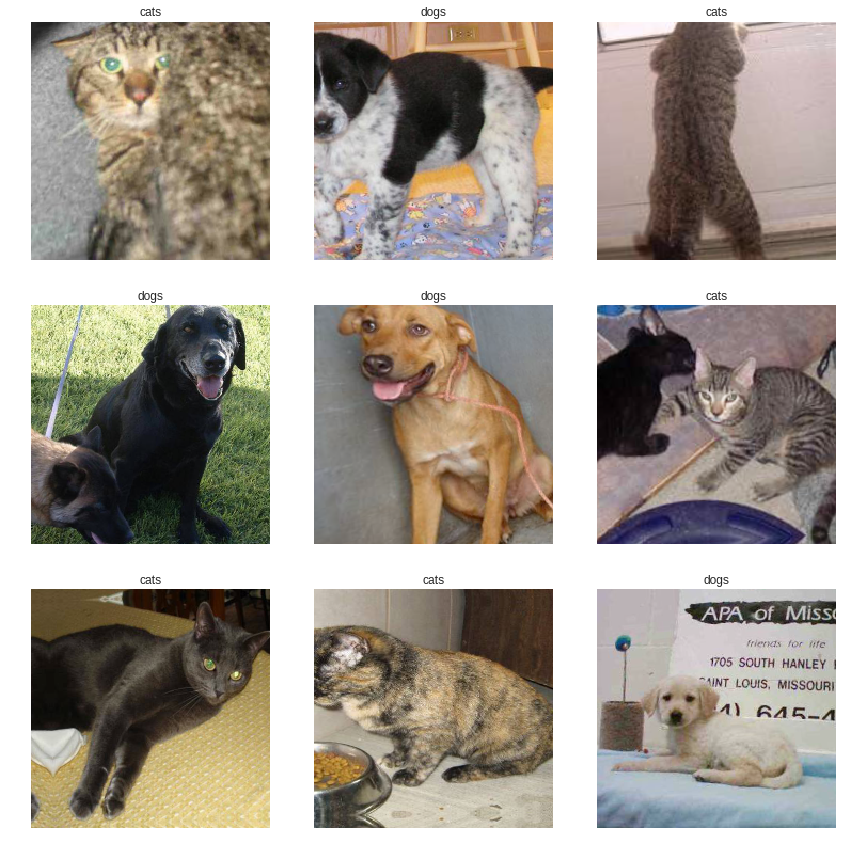

In [0]:
data = ImageDataBunch.from_folder(path, bs=256, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
data.show_batch(rows=3)

In [0]:
learner = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learner.fit_one_cycle(1)

In [0]:
learner.unfreeze()
learner.fit_one_cycle(1, slice(1e-5,3e-4), pct_start=0.05)

In [0]:
accuracy(*learner.TTA())

In [0]:
learner.interpret()

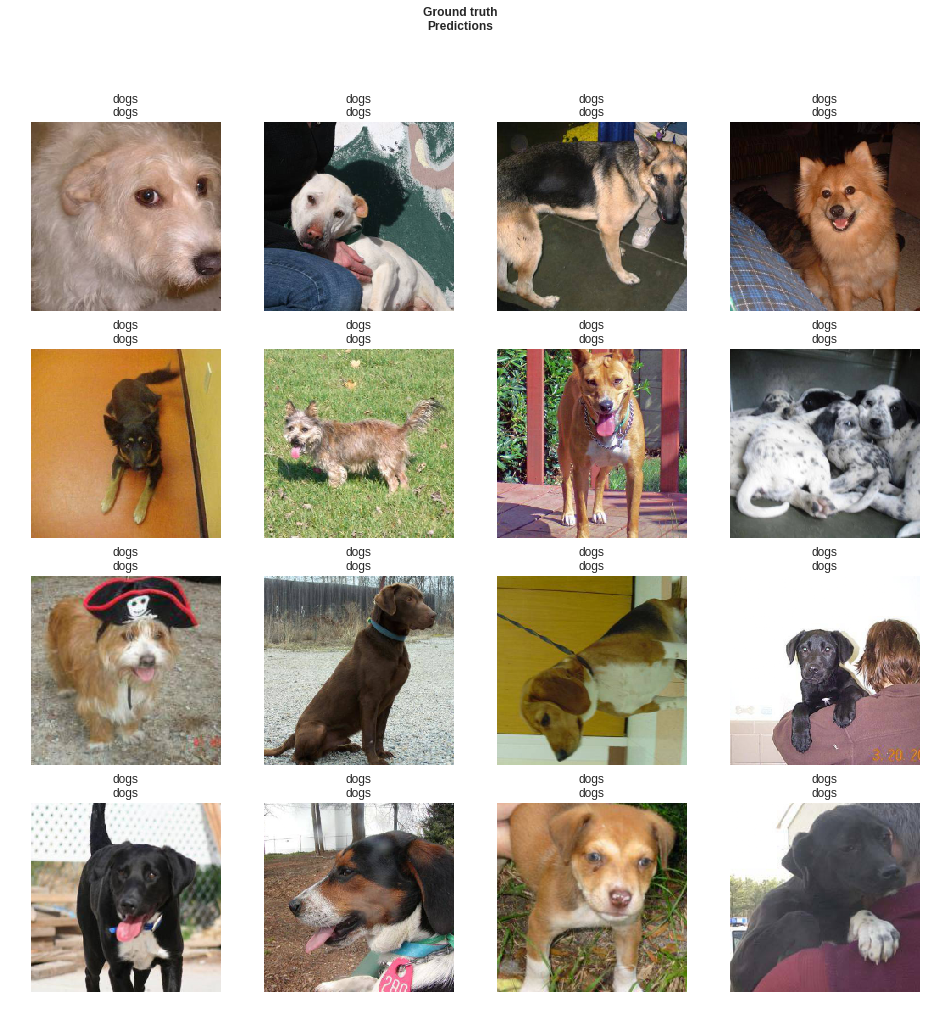

In [0]:
learner.show_results()

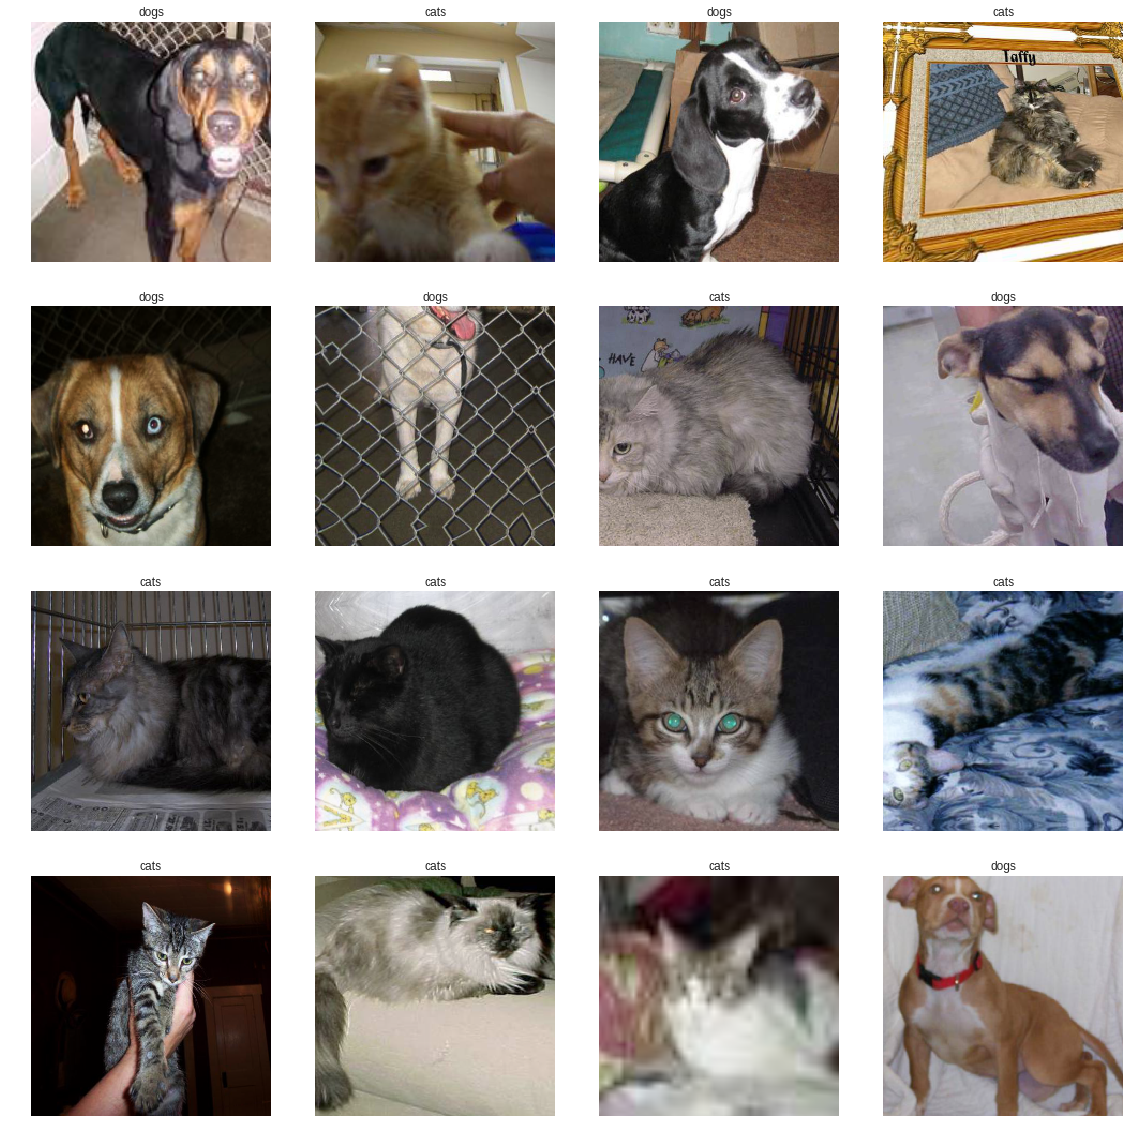

In [0]:
data.show_batch()

In [0]:
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)

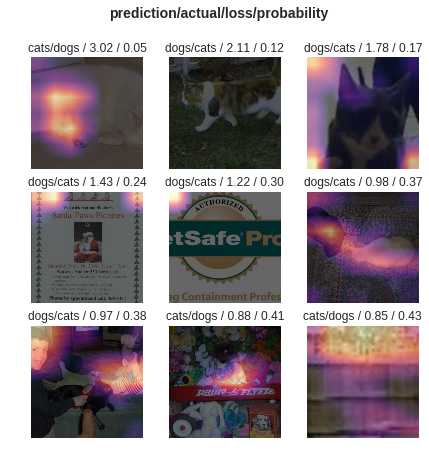

In [0]:
interp.plot_top_losses(9, figsize=(7,7))

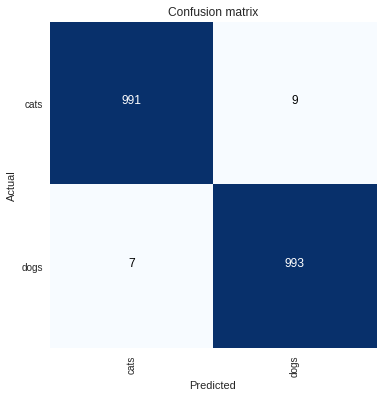

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('cats', 'dogs', 9), ('dogs', 'cats', 7)]

In [0]:
data.classes

['cats', 'dogs']

In [0]:
len(data.train_ds)

23000

In [0]:
len(data.valid_ds)

2000

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: G